In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
from scipy.stats import linregress


In [2]:
# find and read the data file, api or csv? 
# using watson_healthcare_modified.csv

attrition_data = pd.read_csv("Employee Attrition for Healthcare/watson_healthcare_modified.csv")
attrition_data.head()


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#employee_id : verify no duplicates

print("Number of total employee IDs listed = ", + len(attrition_data.EmployeeID))
print("Number of unique employee IDs listed = ", + attrition_data["EmployeeID"].nunique())

#attrition = [] # wether still working or not
attrition_allDF = pd.DataFrame(attrition_data.groupby("Attrition")["EmployeeID"].count())
attrition_allDF = attrition_allDF.rename(columns={"EmployeeID": "# Total Employees"})
print(attrition_allDF)


#monthly_income = [] #use this as base pay
#percent_salary_hike = [] # us for recent pay raises
#business_travel = [] # travel_rarely considered full-time, travel_frequently considered part-time or travel nurses



Number of total employee IDs listed =  1676
Number of unique employee IDs listed =  1676
           # Total Employees
Attrition                   
No                      1477
Yes                      199


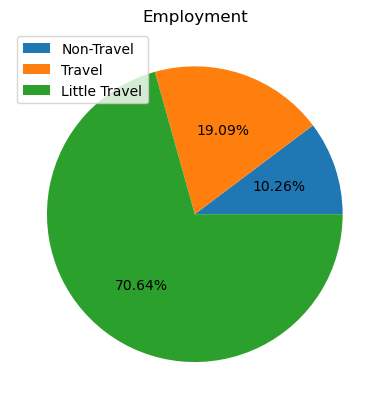

In [4]:
# FT v PT 
FtPt = pd.DataFrame(attrition_data.groupby("BusinessTravel")["EmployeeID"].count())
employment = FtPt.plot(kind="pie", y="EmployeeID", ylabel="", title="Employment", labeldistance=None, autopct="%1.2f%%")
employment.legend(["Non-Travel", "Travel", "Little Travel"])
plt.savefig("Employment_Types.png")

In [5]:
# setup dataframe for just Part time employees
part_time_df = attrition_data[attrition_data.BusinessTravel == 'Travel_Frequently']
part_time_df


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
8,1469740,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
26,1142062,32,Yes,Travel_Frequently,1125,Maternity,16,1,Life Sciences,1,...,2,80,0,10,5,3,10,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,1855095,27,Yes,Travel_Frequently,1297,Neurology,5,2,Life Sciences,1,...,3,80,0,6,3,2,5,4,0,2
1660,1734708,31,Yes,Travel_Frequently,1060,Cardiology,1,3,Life Sciences,1,...,1,80,0,3,2,4,3,2,2,2
1662,1341748,26,Yes,Travel_Frequently,426,Neurology,17,4,Life Sciences,1,...,2,80,1,8,2,2,7,7,1,0
1665,1549806,21,Yes,Travel_Frequently,251,Neurology,10,2,Life Sciences,1,...,3,80,0,2,2,1,2,2,2,2


In [6]:
#attrition Travel Nurses; wether still working or not
attrition_travelDF = pd.DataFrame(part_time_df.groupby("Attrition")["EmployeeID"].count())
attrition_travelDF = attrition_travelDF.rename(columns={"EmployeeID": "# Travel Employees"})
print(attrition_travelDF)

           # Travel Employees
Attrition                    
No                        263
Yes                        57


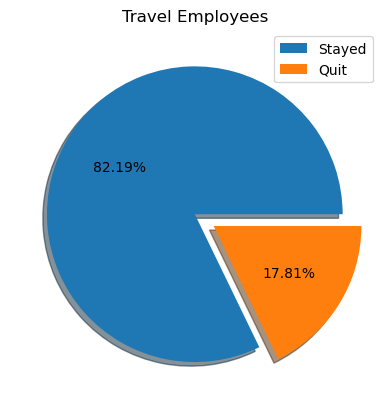

In [7]:
# Attrition Rates
yesNoPT = pd.DataFrame(part_time_df.groupby("Attrition")["EmployeeID"].count())
attritionRatesEmp = yesNoPT.plot(kind="pie", y="EmployeeID", ylabel="", title="Travel Employees", shadow=True, explode=[0,0.15], labeldistance=None, autopct="%1.2f%%")
attritionRatesEmp.legend(["Stayed", "Quit"])
plt.savefig("Travel_Attrition.png")

In [8]:
## setup dataframe for just Part time employees
full_time_df = attrition_data[(attrition_data.BusinessTravel == 'Travel_Rarely') | (attrition_data.BusinessTravel == 'Non-Travel')]
full_time_df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
6,1329390,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,1699288,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [9]:
#attrition FT Nurses; wether still working or not
attrition_FTDF = pd.DataFrame(full_time_df.groupby("Attrition")["EmployeeID"].count())
attrition_FTDF = attrition_FTDF.rename(columns={"EmployeeID": "# Full Time Employees"})
print(attrition_FTDF)

           # Full Time Employees
Attrition                       
No                          1214
Yes                          142


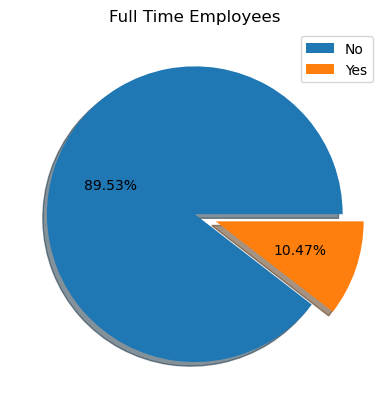

In [10]:
# Attrition Rates
yesNoFT = pd.DataFrame(full_time_df.groupby("Attrition")["EmployeeID"].count())
attritionRates = yesNoFT.plot(kind="pie", y="EmployeeID", ylabel="", title="Full Time Employees", shadow=True, explode=[0,0.15], labeldistance=None, autopct="%1.2f%%")
plt.savefig("FUll_Time_Attrition.png")

In [11]:
# calculate % of attrition for overall, Ft and PT
brkdn1 = pd.merge(attrition_allDF, attrition_FTDF, on="Attrition", how='outer')
brkdn = pd.merge(brkdn1, attrition_travelDF, on="Attrition", how='outer')
brkdn

,# Total Employees,# Full Time Employees,# Travel Employees
Attrition,,,
No,1477,1214,263
Yes,199,142,57


In [12]:
brkdn.reset_index()
brkdn

,# Total Employees,# Full Time Employees,# Travel Employees
Attrition,,,
No,1477,1214,263
Yes,199,142,57


In [15]:
# calculate the %s
# % Total
total_total = brkdn['# Total Employees'].sum()
print("total all employees = ", + total_total)

total_yes = brkdn.loc['Yes']['# Total Employees']
print("total all employees gone = ", + total_yes)

totalGone = (total_yes / total_total) * 100 
print("% all employees gone = ", + totalGone)



#brkdn[percent] = brkdn['# Total Employees'] / brkdn.groupby('Attrition')['# Total Employees'].sum()

total all employees =  1676
total all employees gone =  199
% all employees gone =  11.873508353221956


In [16]:
# Full Time
FT_total = brkdn['# Full Time Employees'].sum()
print("total full time employees = ", + FT_total)

FT_yes = brkdn.loc['Yes']['# Full Time Employees'] 
print("total full time employees gone = ", + FT_yes)

FTGone = (FT_yes / FT_total) * 100 
print("% Full Time employees gone = ", + FTGone)


total full time employees =  1356
total full time employees gone =  142
% Full Time employees gone =  10.471976401179942


In [17]:
# Part Time
Travel_total = attrition_travelDF["# Travel Employees"].sum()
print("total travel employees = ", + Travel_total)

Travel_yes = brkdn.loc['Yes']['# Travel Employees'] 
print("total travel employees gone = ", + Travel_yes)

TravelGone = (Travel_yes / Travel_total) * 100 
print("% Travel employees gone = ", + TravelGone)


total travel employees =  320
total travel employees gone =  57
% Travel employees gone =  17.8125


In [19]:
# add row showing percentages

brkdn.loc["% Gone"] = [totalGone, FTGone, TravelGone]
brkdn.to_csv("breakdown.csv")
brkdn

,# Total Employees,# Full Time Employees,# Travel Employees
Attrition,,,
No,1477.000000,1214.000000,263.0000
Yes,199.000000,142.000000,57.0000
% Gone,11.873508,10.471976,17.8125


In [ ]:
# analyze data with plots of the following;
# pie chart - ft vs pt
# bar chart - attrition vs type (ft and pt)
# bar chart - salary vs attrition vs type (ft / pt)

